# Comprehensive Clustering Algorithm Comparison and Benchmarking

This notebook provides a comprehensive comparison of K-means, Hierarchical, and DBSCAN clustering algorithms applied to Grafana logs.

## Comparison Metrics:
1. **Internal Validation**: Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Score
2. **External Validation**: Adjusted Rand Index, Normalized Mutual Information, V-measure
3. **Performance**: Training time, scalability
4. **Cluster Quality**: Distribution, separation, cohesion
5. **Anomaly Detection**: How well clusters align with true anomalies

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load All Results

In [12]:
# Load metrics from all algorithms
try:
    kmeans_metrics = pd.read_csv('../data/kmeans_metrics.csv')
    print("✓ K-means metrics loaded")
except:
    print("✗ K-means metrics not found")
    kmeans_metrics = None

try:
    hierarchical_metrics = pd.read_csv('../data/hierarchical_metrics_sample.csv')
    print("✓ Hierarchical metrics loaded")
except:
    print("✗ Hierarchical metrics not found")
    hierarchical_metrics = None

try:
    dbscan_metrics = pd.read_csv('../data/dbscan_metrics.csv')
    print("✓ DBSCAN metrics loaded")
except:
    print("✗ DBSCAN metrics not found")
    dbscan_metrics = None

# Load clustering results
try:
    kmeans_results = pd.read_csv('../data/kmeans_results.csv')
    print("✓ K-means results loaded")
except:
    print("✗ K-means results not found")
    kmeans_results = None

try:
    hierarchical_results = pd.read_csv('../data/hierarchical_results.csv')
    print("✓ Hierarchical results loaded")
except:
    print("✗ Hierarchical results not found")
    hierarchical_results = None

try:
    dbscan_results = pd.read_csv('../data/dbscan_results.csv')
    print("✓ DBSCAN results loaded")
except:
    print("✗ DBSCAN results not found")
    dbscan_results = None

# Load feature matrix for visualization
X = pd.read_csv('../data/feature_matrix_scaled.csv')
print("✓ Feature matrix loaded")

✓ K-means metrics loaded
✓ Hierarchical metrics loaded
✓ DBSCAN metrics loaded
✓ K-means results loaded
✓ Hierarchical results loaded
✓ DBSCAN results loaded
✓ Feature matrix loaded


## 2. Combine All Metrics

In [13]:
# Combine all metrics into one dataframe
all_metrics = []

if kmeans_metrics is not None:
    all_metrics.append(kmeans_metrics)
if hierarchical_metrics is not None:
    all_metrics.append(hierarchical_metrics)
if dbscan_metrics is not None:
    all_metrics.append(dbscan_metrics)

if all_metrics:
    combined_metrics = pd.concat(all_metrics, ignore_index=True)
    
    print("\n" + "="*80)
    print("COMBINED METRICS COMPARISON")
    print("="*80)
    print(combined_metrics.to_string(index=False))
    print("="*80)
else:
    print("No metrics available for comparison")
    combined_metrics = None


COMBINED METRICS COMPARISON
   algorithm  n_clusters  training_time  silhouette_score  davies_bouldin_index  calinski_harabasz_score      inertia  adjusted_rand_index  normalized_mutual_info  homogeneity  completeness  v_measure linkage     eps  min_samples  n_noise  noise_ratio  noise_anomaly_rate  non_noise_anomaly_rate
     K-means           7       2.640212          0.210585              1.705911             25025.298730 2.773504e+06             0.141997                0.290833     0.679969      0.184975   0.290833     NaN     NaN          NaN      NaN          NaN                 NaN                     NaN
Hierarchical           8       2.572874          0.195386              1.724349               766.629459          NaN             0.116879                0.298778     0.747909      0.186676   0.298778    ward     NaN          NaN      NaN          NaN                 NaN                     NaN
      DBSCAN         609     108.054265          0.329712              1.327886    

## 3. Visual Comparison of Metrics

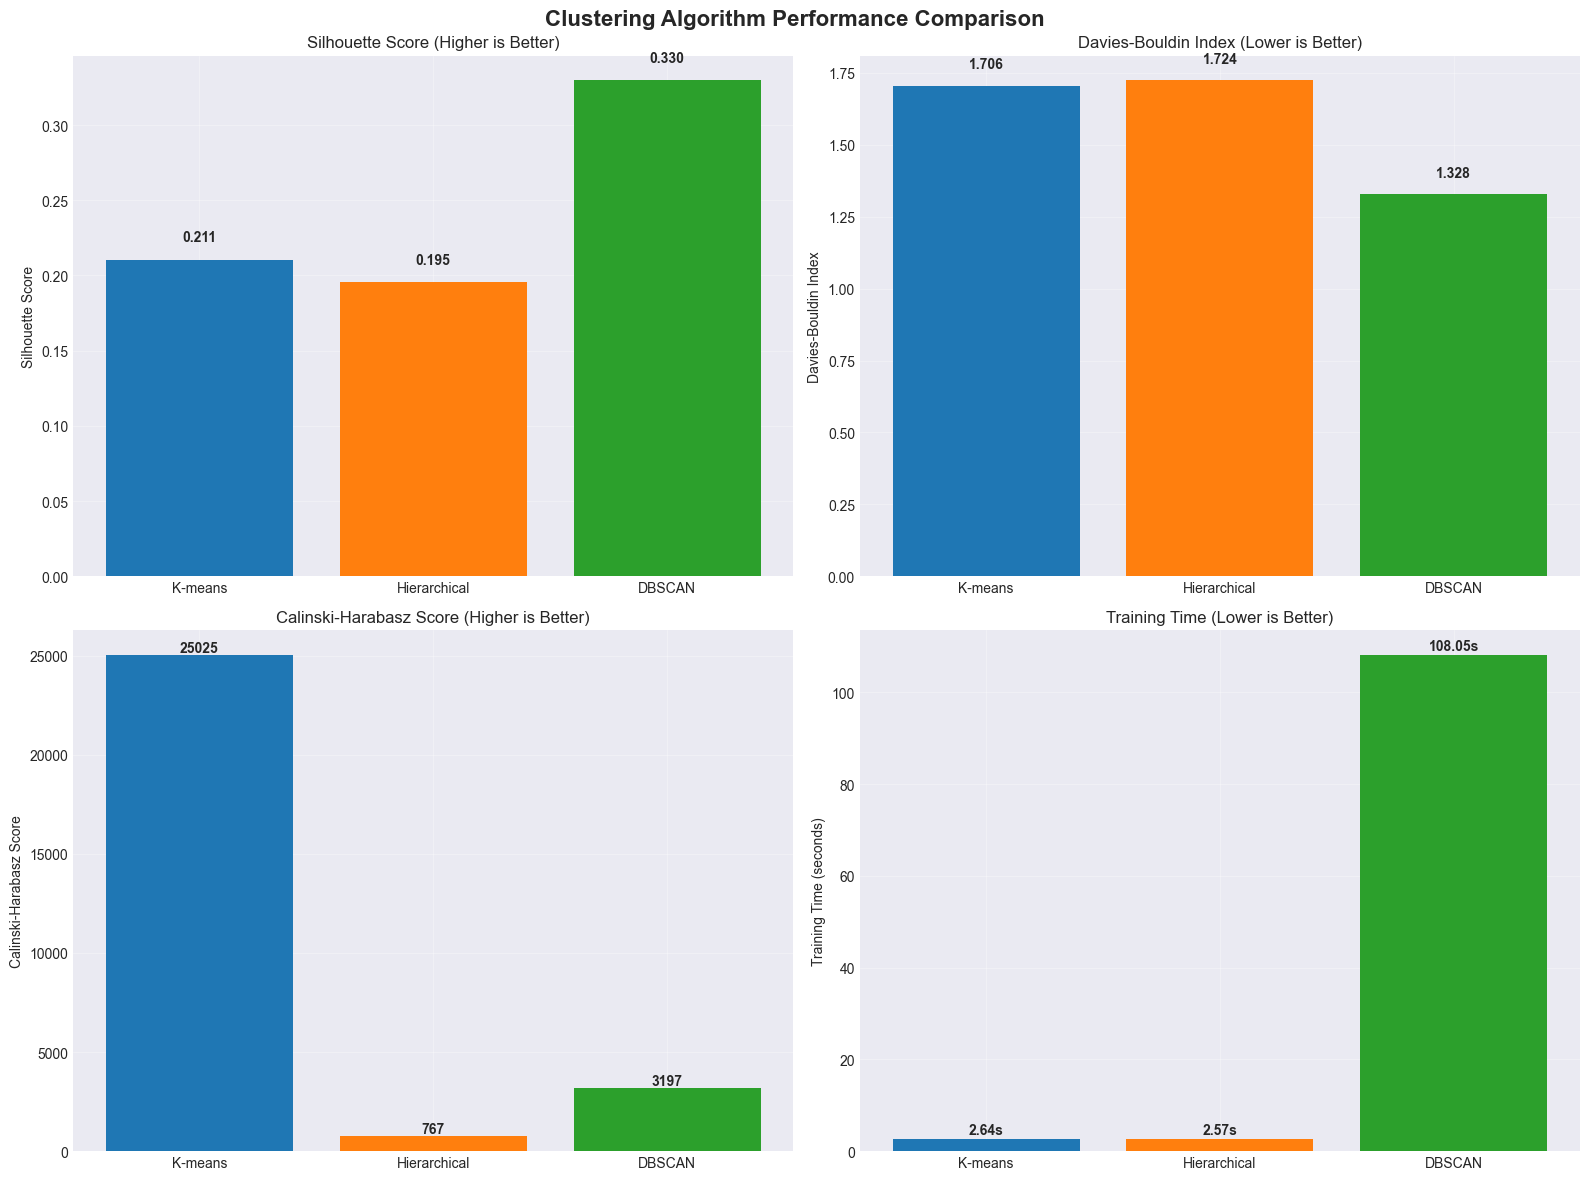

In [14]:
if combined_metrics is not None:
    # Select key metrics for comparison
    metric_cols = ['silhouette_score', 'davies_bouldin_index', 'calinski_harabasz_score', 'training_time']
    external_cols = ['adjusted_rand_index', 'normalized_mutual_info', 'v_measure']
    
    # Filter available metrics
    available_metrics = [col for col in metric_cols if col in combined_metrics.columns]
    available_external = [col for col in external_cols if col in combined_metrics.columns]
    
    if available_metrics:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Clustering Algorithm Performance Comparison', fontsize=16, fontweight='bold')
        
        algorithms = combined_metrics['algorithm'].values
        x_pos = np.arange(len(algorithms))
        
        # Silhouette Score (higher is better)
        if 'silhouette_score' in combined_metrics.columns:
            scores = combined_metrics['silhouette_score'].fillna(0)
            bars = axes[0, 0].bar(x_pos, scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'][:len(algorithms)])
            axes[0, 0].set_ylabel('Silhouette Score')
            axes[0, 0].set_title('Silhouette Score (Higher is Better)')
            axes[0, 0].set_xticks(x_pos)
            axes[0, 0].set_xticklabels(algorithms)
            axes[0, 0].grid(True, alpha=0.3)
            axes[0, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
            
            # Add value labels on bars
            for i, (bar, val) in enumerate(zip(bars, scores)):
                if not pd.isna(val):
                    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                                   f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # Davies-Bouldin Index (lower is better)
        if 'davies_bouldin_index' in combined_metrics.columns:
            scores = combined_metrics['davies_bouldin_index'].fillna(0)
            bars = axes[0, 1].bar(x_pos, scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'][:len(algorithms)])
            axes[0, 1].set_ylabel('Davies-Bouldin Index')
            axes[0, 1].set_title('Davies-Bouldin Index (Lower is Better)')
            axes[0, 1].set_xticks(x_pos)
            axes[0, 1].set_xticklabels(algorithms)
            axes[0, 1].grid(True, alpha=0.3)
            
            for i, (bar, val) in enumerate(zip(bars, scores)):
                if not pd.isna(val):
                    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                                   f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # Calinski-Harabasz Score (higher is better)
        if 'calinski_harabasz_score' in combined_metrics.columns:
            scores = combined_metrics['calinski_harabasz_score'].fillna(0)
            bars = axes[1, 0].bar(x_pos, scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'][:len(algorithms)])
            axes[1, 0].set_ylabel('Calinski-Harabasz Score')
            axes[1, 0].set_title('Calinski-Harabasz Score (Higher is Better)')
            axes[1, 0].set_xticks(x_pos)
            axes[1, 0].set_xticklabels(algorithms)
            axes[1, 0].grid(True, alpha=0.3)
            
            for i, (bar, val) in enumerate(zip(bars, scores)):
                if not pd.isna(val) and val > 0:
                    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                                   f'{val:.0f}', ha='center', va='bottom', fontweight='bold')
        
        # Training Time (lower is better)
        if 'training_time' in combined_metrics.columns:
            times = combined_metrics['training_time'].values
            bars = axes[1, 1].bar(x_pos, times, color=['#1f77b4', '#ff7f0e', '#2ca02c'][:len(algorithms)])
            axes[1, 1].set_ylabel('Training Time (seconds)')
            axes[1, 1].set_title('Training Time (Lower is Better)')
            axes[1, 1].set_xticks(x_pos)
            axes[1, 1].set_xticklabels(algorithms)
            axes[1, 1].grid(True, alpha=0.3)
            
            for i, (bar, val) in enumerate(zip(bars, times)):
                axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                               f'{val:.2f}s', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()

## 4. External Validation Metrics Comparison

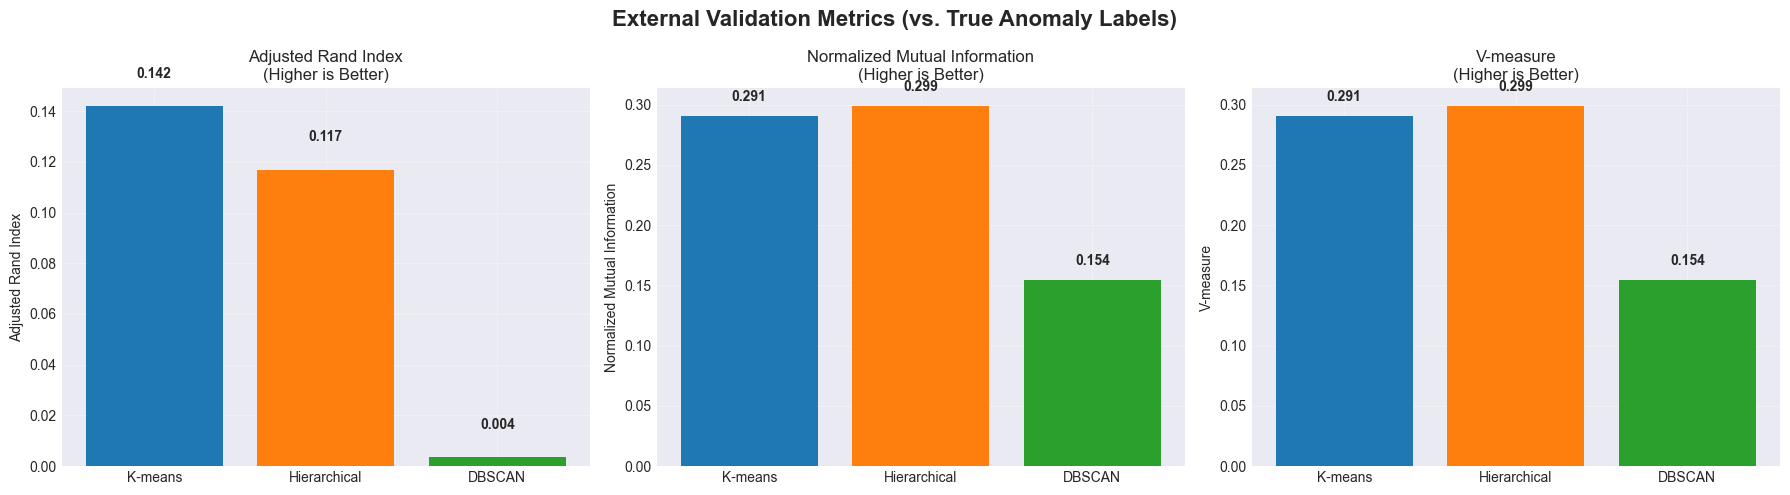

In [15]:
if combined_metrics is not None and available_external:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('External Validation Metrics (vs. True Anomaly Labels)', fontsize=16, fontweight='bold')
    
    algorithms = combined_metrics['algorithm'].values
    x_pos = np.arange(len(algorithms))
    
    # Adjusted Rand Index
    if 'adjusted_rand_index' in combined_metrics.columns:
        scores = combined_metrics['adjusted_rand_index'].values
        bars = axes[0].bar(x_pos, scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'][:len(algorithms)])
        axes[0].set_ylabel('Adjusted Rand Index')
        axes[0].set_title('Adjusted Rand Index\n(Higher is Better)')
        axes[0].set_xticks(x_pos)
        axes[0].set_xticklabels(algorithms)
        axes[0].grid(True, alpha=0.3)
        axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        
        for bar, val in zip(bars, scores):
            axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Normalized Mutual Information
    if 'normalized_mutual_info' in combined_metrics.columns:
        scores = combined_metrics['normalized_mutual_info'].values
        bars = axes[1].bar(x_pos, scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'][:len(algorithms)])
        axes[1].set_ylabel('Normalized Mutual Information')
        axes[1].set_title('Normalized Mutual Information\n(Higher is Better)')
        axes[1].set_xticks(x_pos)
        axes[1].set_xticklabels(algorithms)
        axes[1].grid(True, alpha=0.3)
        
        for bar, val in zip(bars, scores):
            axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # V-measure
    if 'v_measure' in combined_metrics.columns:
        scores = combined_metrics['v_measure'].values
        bars = axes[2].bar(x_pos, scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'][:len(algorithms)])
        axes[2].set_ylabel('V-measure')
        axes[2].set_title('V-measure\n(Higher is Better)')
        axes[2].set_xticks(x_pos)
        axes[2].set_xticklabels(algorithms)
        axes[2].grid(True, alpha=0.3)
        
        for bar, val in zip(bars, scores):
            axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## 5. Cluster Distribution Comparison

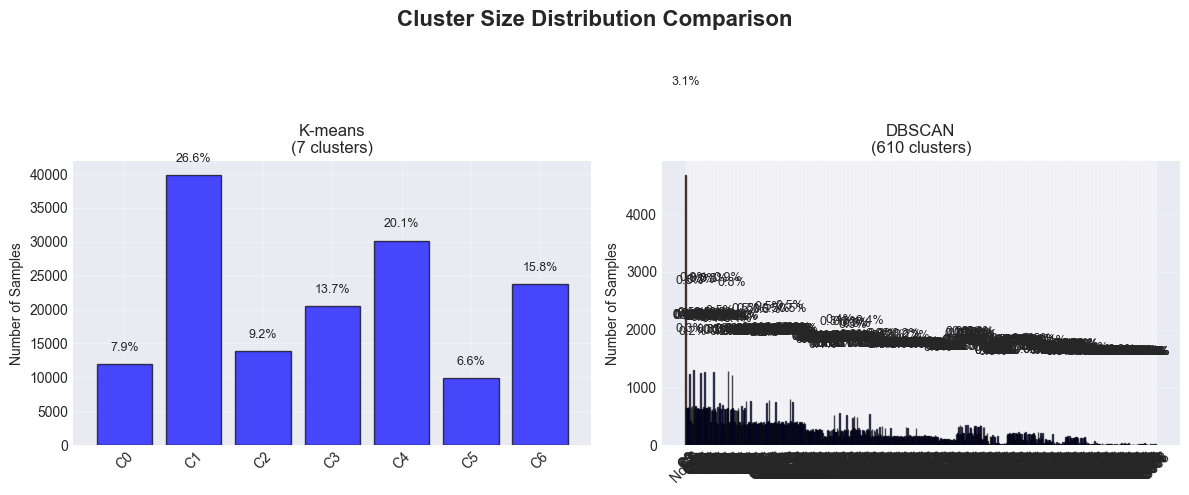

In [16]:
# Compare cluster distributions
results_list = []
names = []

if kmeans_results is not None and 'kmeans_cluster' in kmeans_results.columns:
    results_list.append(kmeans_results['kmeans_cluster'])
    names.append('K-means')

if hierarchical_results is not None and 'hierarchical_cluster' in hierarchical_results.columns:
    results_list.append(hierarchical_results['hierarchical_cluster'])
    names.append('Hierarchical')

if dbscan_results is not None and 'dbscan_cluster' in dbscan_results.columns:
    results_list.append(dbscan_results['dbscan_cluster'])
    names.append('DBSCAN')

if results_list:
    fig, axes = plt.subplots(1, len(results_list), figsize=(6*len(results_list), 5))
    if len(results_list) == 1:
        axes = [axes]
    
    fig.suptitle('Cluster Size Distribution Comparison', fontsize=16, fontweight='bold')
    
    for idx, (labels, name) in enumerate(zip(results_list, names)):
        cluster_counts = labels.value_counts().sort_index()
        
        # Create labels for bars
        bar_labels = []
        for cluster_id in cluster_counts.index:
            if cluster_id == -1:
                bar_labels.append('Noise')
            else:
                bar_labels.append(f'C{int(cluster_id)}')
        
        # Create colors (red for noise, blue for clusters)
        colors = ['red' if i == -1 else 'blue' for i in cluster_counts.index]
        
        axes[idx].bar(range(len(cluster_counts)), cluster_counts.values, 
                     color=colors, alpha=0.7, edgecolor='black')
        axes[idx].set_xticks(range(len(cluster_counts)))
        axes[idx].set_xticklabels(bar_labels, rotation=45)
        axes[idx].set_ylabel('Number of Samples')
        axes[idx].set_title(f'{name}\n({len(cluster_counts)} clusters)')
        axes[idx].grid(True, alpha=0.3)
        
        # Add percentage labels
        total = cluster_counts.sum()
        for i, (bar_x, count) in enumerate(zip(range(len(cluster_counts)), cluster_counts.values)):
            percentage = (count / total) * 100
            axes[idx].text(bar_x, count + total*0.01, f'{percentage:.1f}%',
                         ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

## 6. Side-by-Side Visualization

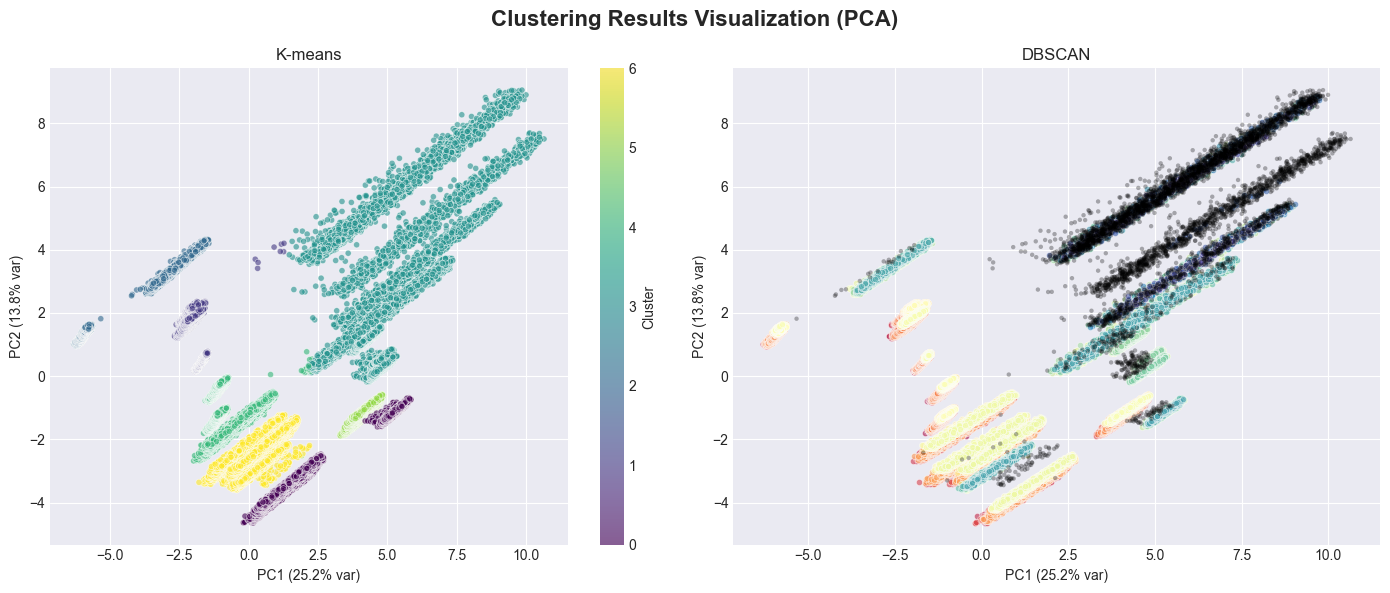

In [17]:
# Visualize all clustering results side by side
if results_list:
    # Perform PCA for visualization
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)
    
    fig, axes = plt.subplots(1, len(results_list), figsize=(7*len(results_list), 6))
    if len(results_list) == 1:
        axes = [axes]
    
    fig.suptitle('Clustering Results Visualization (PCA)', fontsize=16, fontweight='bold')
    
    for idx, (labels, name) in enumerate(zip(results_list, names)):
        if name == 'DBSCAN':
            # Special handling for DBSCAN with noise points
            unique_labels = set(labels)
            colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
            
            for k, col in zip(unique_labels, colors):
                if k == -1:
                    col = 'black'
                
                class_member_mask = (labels == k).values
                xy = X_pca[class_member_mask]
                
                if k == -1:
                    axes[idx].scatter(xy[:, 0], xy[:, 1], c=[col], alpha=0.3, s=10, 
                                    edgecolors='none', label='Noise')
                else:
                    axes[idx].scatter(xy[:, 0], xy[:, 1], c=[col], alpha=0.6, s=20, 
                                    edgecolors='w', linewidth=0.5)
        else:
            scatter = axes[idx].scatter(X_pca[:, 0], X_pca[:, 1], 
                                       c=labels, cmap='viridis', 
                                       alpha=0.6, s=20, edgecolors='w', linewidth=0.5)
            plt.colorbar(scatter, ax=axes[idx], label='Cluster')
        
        axes[idx].set_title(f'{name}')
        axes[idx].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)')
        axes[idx].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)')
    
    plt.tight_layout()
    plt.show()

## 7. Anomaly Detection Performance


ANOMALY DETECTION PERFORMANCE
Algorithm  Overall Anomaly Rate (%)  Max Cluster Anomaly Rate (%)  Enrichment Factor  Cluster with Max Anomalies
  K-means                 20.000133                         100.0           4.999967                           3
   DBSCAN                 20.000133                         100.0           4.999967                         349

Enrichment Factor: How many times more likely anomalies are in the
best cluster compared to random assignment.
Higher is better (>1 means better than random).


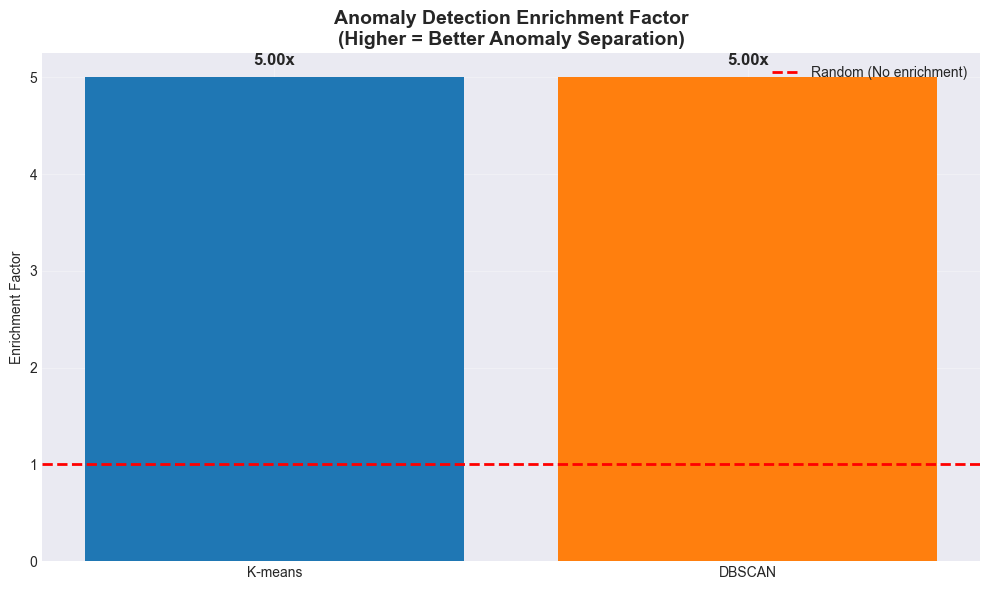

In [18]:
# Analyze how well each algorithm separates anomalies
if results_list:
    anomaly_analysis = []
    
    for labels, name in zip(results_list, names):
        # Get corresponding results dataframe
        if name == 'K-means' and kmeans_results is not None:
            df = kmeans_results
        elif name == 'Hierarchical' and hierarchical_results is not None:
            df = hierarchical_results
        elif name == 'DBSCAN' and dbscan_results is not None:
            df = dbscan_results
        else:
            continue
        
        if 'is_anomaly' not in df.columns:
            continue
        
        # Find cluster with highest anomaly rate
        cluster_col = f'{name.lower().replace("-", "")}_cluster'
        if cluster_col not in df.columns:
            continue
        
        cluster_stats = df.groupby(cluster_col)['is_anomaly'].agg(['sum', 'count', 'mean'])
        cluster_stats['anomaly_rate'] = cluster_stats['mean'] * 100
        
        # Get cluster with max anomaly rate
        max_anomaly_cluster = cluster_stats['anomaly_rate'].idxmax()
        max_anomaly_rate = cluster_stats['anomaly_rate'].max()
        
        # Get overall anomaly rate
        overall_anomaly_rate = df['is_anomaly'].mean() * 100
        
        # Calculate enrichment (how much better than random)
        enrichment = max_anomaly_rate / overall_anomaly_rate if overall_anomaly_rate > 0 else 0
        
        anomaly_analysis.append({
            'Algorithm': name,
            'Overall Anomaly Rate (%)': overall_anomaly_rate,
            'Max Cluster Anomaly Rate (%)': max_anomaly_rate,
            'Enrichment Factor': enrichment,
            'Cluster with Max Anomalies': max_anomaly_cluster
        })
    
    if anomaly_analysis:
        anomaly_df = pd.DataFrame(anomaly_analysis)
        
        print("\n" + "="*80)
        print("ANOMALY DETECTION PERFORMANCE")
        print("="*80)
        print(anomaly_df.to_string(index=False))
        print("="*80)
        print("\nEnrichment Factor: How many times more likely anomalies are in the")
        print("best cluster compared to random assignment.")
        print("Higher is better (>1 means better than random).")
        
        # Visualize enrichment
        fig, ax = plt.subplots(figsize=(10, 6))
        
        bars = ax.bar(anomaly_df['Algorithm'], anomaly_df['Enrichment Factor'],
                     color=['#1f77b4', '#ff7f0e', '#2ca02c'][:len(anomaly_df)])
        ax.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Random (No enrichment)')
        ax.set_ylabel('Enrichment Factor')
        ax.set_title('Anomaly Detection Enrichment Factor\n(Higher = Better Anomaly Separation)', 
                    fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{height:.2f}x', ha='center', va='bottom', fontweight='bold', fontsize=12)
        
        plt.tight_layout()
        plt.show()

## 8. Ranking and Recommendation

In [19]:
if combined_metrics is not None:
    # Create ranking based on multiple criteria
    ranking_df = combined_metrics[['algorithm']].copy()
    
    # Normalize metrics to 0-1 scale for fair comparison
    # Higher is better: Silhouette, Calinski-Harabasz, ARI, NMI, V-measure
    # Lower is better: Davies-Bouldin, Training Time
    
    metrics_to_rank = []
    
    if 'silhouette_score' in combined_metrics.columns:
        ranking_df['silhouette_rank'] = combined_metrics['silhouette_score'].rank(ascending=False)
        metrics_to_rank.append('silhouette_rank')
    
    if 'davies_bouldin_index' in combined_metrics.columns:
        ranking_df['davies_bouldin_rank'] = combined_metrics['davies_bouldin_index'].rank(ascending=True)
        metrics_to_rank.append('davies_bouldin_rank')
    
    if 'calinski_harabasz_score' in combined_metrics.columns:
        ranking_df['calinski_harabasz_rank'] = combined_metrics['calinski_harabasz_score'].rank(ascending=False)
        metrics_to_rank.append('calinski_harabasz_rank')
    
    if 'training_time' in combined_metrics.columns:
        ranking_df['time_rank'] = combined_metrics['training_time'].rank(ascending=True)
        metrics_to_rank.append('time_rank')
    
    if 'adjusted_rand_index' in combined_metrics.columns:
        ranking_df['ari_rank'] = combined_metrics['adjusted_rand_index'].rank(ascending=False)
        metrics_to_rank.append('ari_rank')
    
    if 'v_measure' in combined_metrics.columns:
        ranking_df['v_measure_rank'] = combined_metrics['v_measure'].rank(ascending=False)
        metrics_to_rank.append('v_measure_rank')
    
    # Calculate average rank (lower is better)
    if metrics_to_rank:
        ranking_df['avg_rank'] = ranking_df[metrics_to_rank].mean(axis=1)
        ranking_df = ranking_df.sort_values('avg_rank')
        
        print("\n" + "="*80)
        print("ALGORITHM RANKING (Lower Average Rank = Better Overall Performance)")
        print("="*80)
        print(ranking_df.to_string(index=False))
        print("="*80)
        
        # Recommendation
        best_algorithm = ranking_df.iloc[0]['algorithm']
        
        print("\n" + "🏆 " * 40)
        print(f"\n RECOMMENDED ALGORITHM: {best_algorithm}")
        print("\n" + "🏆 " * 40)
        
        print("\n📊 DECISION CRITERIA:")
        print("\nChoose based on your priorities:")
        print("\n1. Best Internal Clustering Quality:")
        if 'silhouette_score' in combined_metrics.columns:
            best_silhouette = combined_metrics.loc[combined_metrics['silhouette_score'].idxmax(), 'algorithm']
            print(f"   → {best_silhouette} (highest silhouette score)")
        
        print("\n2. Fastest Training:")
        if 'training_time' in combined_metrics.columns:
            fastest = combined_metrics.loc[combined_metrics['training_time'].idxmin(), 'algorithm']
            print(f"   → {fastest}")
        
        print("\n3. Best Anomaly Detection:")
        if 'adjusted_rand_index' in combined_metrics.columns:
            best_anomaly = combined_metrics.loc[combined_metrics['adjusted_rand_index'].idxmax(), 'algorithm']
            print(f"   → {best_anomaly} (highest ARI vs. true anomalies)")
        
        print("\n4. Finds Outliers/Noise:")
        print("   → DBSCAN (can identify outliers as noise points)")
        
        print("\n5. No Need to Specify Cluster Count:")
        print("   → DBSCAN (determines clusters automatically)")


ALGORITHM RANKING (Lower Average Rank = Better Overall Performance)
   algorithm  silhouette_rank  davies_bouldin_rank  calinski_harabasz_rank  time_rank  ari_rank  v_measure_rank  avg_rank
     K-means              2.0                  2.0                     1.0        2.0       1.0             2.0  1.666667
Hierarchical              3.0                  3.0                     3.0        1.0       2.0             1.0  2.166667
      DBSCAN              1.0                  1.0                     2.0        3.0       3.0             3.0  2.166667

🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 

 RECOMMENDED ALGORITHM: K-means

🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 🏆 

📊 DECISION CRITERIA:

Choose based on your priorities:

1. Best Internal Clustering Quality:
   → DBSCAN (highest silhouette score)

2. Fastest Training:
   → Hierarchical

3. Best Anomaly Detection:
   → K-means (highest ARI vs. true anomalies)

## 9. Save Comprehensive Comparison Report

In [20]:
# Save combined metrics
if combined_metrics is not None:
    combined_metrics.to_csv('../data/comprehensive_comparison.csv', index=False)
    print("✓ Comprehensive comparison saved to: ../data/comprehensive_comparison.csv")

# Save ranking
if 'ranking_df' in locals():
    ranking_df.to_csv('../data/algorithm_ranking.csv', index=False)
    print("✓ Algorithm ranking saved to: ../data/algorithm_ranking.csv")

# Save anomaly analysis
if 'anomaly_df' in locals():
    anomaly_df.to_csv('../data/anomaly_detection_performance.csv', index=False)
    print("✓ Anomaly detection performance saved to: ../data/anomaly_detection_performance.csv")

print("\n" + "="*80)
print("COMPREHENSIVE COMPARISON COMPLETE!")
print("="*80)
print("\nAll results have been saved to the ../data/ directory.")
print("\nKey findings:")
print("1. Check 'comprehensive_comparison.csv' for all metrics")
print("2. Check 'algorithm_ranking.csv' for overall performance ranking")
print("3. Check 'anomaly_detection_performance.csv' for anomaly detection results")
print("="*80)

✓ Comprehensive comparison saved to: ../data/comprehensive_comparison.csv
✓ Algorithm ranking saved to: ../data/algorithm_ranking.csv
✓ Anomaly detection performance saved to: ../data/anomaly_detection_performance.csv

COMPREHENSIVE COMPARISON COMPLETE!

All results have been saved to the ../data/ directory.

Key findings:
1. Check 'comprehensive_comparison.csv' for all metrics
2. Check 'algorithm_ranking.csv' for overall performance ranking
3. Check 'anomaly_detection_performance.csv' for anomaly detection results
